# Data Science 101, 20192 HW2 Solution

In [1]:
# ---------------------------------------------
# store ndarray all image after read and resize
# ---------------------------------------------
import os
import numpy as np 
import cv2 

DATA = np.zeros((1440, 4096), dtype=float)  # Full Data
LABEL = np.zeros((1440, 1), dtype=int)       # Class Label for Full Data
dataset_path = 'coil-20-proc'
idx = 0
for classID in range(1, 21):
    for sampleID in range(0, 72):
        filename = "obj{}__{}.png".format(classID, sampleID)
        # print(filename, idx)
        fs = os.path.join('.', dataset_path, filename)
        img = cv2.imread(fs, cv2.IMREAD_GRAYSCALE)
        if type(img) is not np.ndarray: 
            print("Image Read Failed")
            exit()
        reimg = cv2.resize(img, (64,64))
        DATA[idx,:] = reimg.reshape(-1)
        LABEL[idx,:] = classID
        idx += 1

(64, 64)


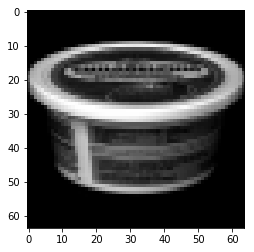

In [2]:
# ---------------------------------------------
# show sample image
# ---------------------------------------------
import matplotlib.pyplot as plt
%matplotlib inline
img = DATA[1439,:].reshape(64,64)
print(img.shape)
plt.imshow(img, cmap='gray')

In [3]:
# ---------------------------------------------
# split data into train and test
# ---------------------------------------------
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(DATA, LABEL, test_size=0.5, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
#print(Ytrain.shape)
#print(Ytest)

(720, 4096)
(720, 4096)


In [4]:
# ---------------------------------------------
# pre-processing
# ---------------------------------------------
Xtrain = Xtrain / 255.
Xtest = Xtest / 255.

In [5]:
# ---------------------------------------------
# feature extraction & K-NN(K=1)
# ---------------------------------------------
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# PCA 95% information retention for LDA
pca95 = PCA(n_components=0.95)
pca95.fit(Xtrain)
Xpca95 = pca95.transform(Xtrain)
Xtpca95 = pca95.transform(Xtest)
#print(Xpca95.shape)
#print(Xpca95[0,:10])

resultPCA = np.zeros((19, 1), dtype=float)
resultLDA = np.zeros((19, 1), dtype=float)
for i in range(19):
    # PCA
    pca = PCA(n_components=i+1)
    pca.fit(Xtrain)
    Xpca = pca.transform(Xtrain)
    Xtpca = pca.transform(Xtest)
    
    # LDA
    lda = LinearDiscriminantAnalysis(n_components=i+1)
    lda.fit(Xpca95, np.ravel(Ytrain))
    Xlda = lda.transform(Xpca95)
    Xtlda = lda.transform(Xtpca95)
    
    # KNN
    neigh = KNeighborsClassifier(n_neighbors=7)
    neigh.fit(Xpca, np.ravel(Ytrain))
    resultPCA[i,0] = neigh.score(Xtpca, np.ravel(Ytest))
    neigh.fit(Xlda, np.ravel(Ytrain))
    resultLDA[i,0] = neigh.score(Xtlda, np.ravel(Ytest))

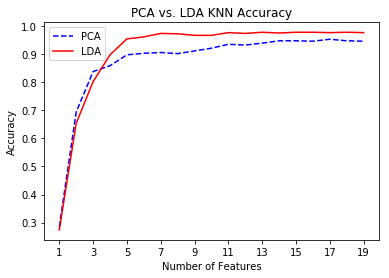

In [6]:
plt.plot(np.linspace(1,19, num=19), resultPCA, linestyle='--', color='b', label = 'PCA')
plt.plot(np.linspace(1,19, num=19), resultLDA, linestyle='-', color='r', label = 'LDA')
plt.xticks(np.arange(1, 20, step=2))
plt.title('PCA vs. LDA KNN Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
print('PCA Best Accuracy = {:.2f}'.format(np.max(resultPCA)))
print('LDA Best Accuracy = {:.2f}'.format(np.max(resultLDA)))

PCA Best Accuracy = 0.95
LDA Best Accuracy = 0.98
